<a href="https://colab.research.google.com/github/MichelaPascale/PrimaProvaChallenge/blob/main/SecondaProvaChallenge/Notebook_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Operazioni preliminari

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [10]:
train.sample(10)

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
975,Yes,4255-DDUOU,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,20.5
524,No,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8
4331,No,2088-IEBAU,Female,0,No,No,68,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,88.15,6148.45
36,No,3863-QSTYI,Male,0,No,No,59,Yes,No,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,64.65,3735.45
2171,No,7729-JTEEC,Male,0,Yes,Yes,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.50,90.05
3013,Yes,5143-WMWOG,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.95,19.95
660,Yes,1450-SKCVI,Female,0,No,No,56,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,73.85,4092.85
4213,No,2525-GVKQU,Female,0,No,No,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.60,1093
3348,Yes,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.9
2261,No,6281-FKEWS,Female,0,No,No,44,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,49.05,2265


In [4]:
test.sample(10)

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
363,No,2972-YDYUW,Female,0,No,No,57,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,One year,No,Electronic check,94.70,5468.95
950,Yes,0968-GSIKN,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.80,70.8
492,No,9207-ZPANB,Male,0,No,No,37,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Electronic check,67.45,2443.3
872,No,8272-ONJLV,Male,0,No,No,12,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Electronic check,95.70,1184
960,No,8152-VETUR,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Credit card (automatic),97.70,6869.7
128,No,1171-TYKUR,Male,0,Yes,No,47,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,25.40,1139.2
885,No,1329-VHWNP,Female,0,No,No,7,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),25.05,189.95
43,No,8646-JCOMS,Female,0,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Bank transfer (automatic),90.55,6130.95
1076,No,5223-UZAVK,Male,0,No,No,64,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),100.30,6603.8
856,No,4860-IJUDE,Male,0,No,No,13,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),73.75,956.65


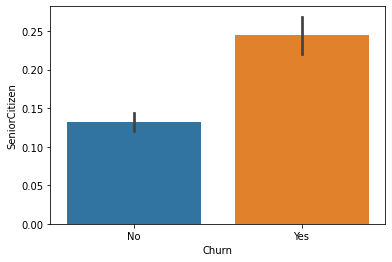

In [8]:
sns.barplot(x=train['Churn'], y=train['SeniorCitizen'])

In [ ]:
train.describe(include='all')

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,4507,4507,4507,4507.000000,4507,4507,4507.000000,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507,4507.000000,4507
unique,2,4507,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,4276
top,No,9069-LGEUL,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,3316,1,2325,NaN,2327,3181,NaN,4068,2180,1967,2252,1941,1989,2234,1779,1771,2487,2646,1521,NaN,10
mean,NaN,NaN,NaN,0.161748,NaN,NaN,32.044597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.808764,NaN
std,NaN,NaN,NaN,0.368261,NaN,NaN,24.328049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.047022,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.850000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.450000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   object 
 1   customerID        4507 non-null   object 
 2   gender            4507 non-null   object 
 3   SeniorCitizen     4507 non-null   int64  
 4   Partner           4507 non-null   object 
 5   Dependents        4507 non-null   object 
 6   tenure            4507 non-null   int64  
 7   PhoneService      4507 non-null   object 
 8   MultipleLines     4507 non-null   object 
 9   InternetService   4507 non-null   object 
 10  OnlineSecurity    4507 non-null   object 
 11  OnlineBackup      4507 non-null   object 
 12  DeviceProtection  4507 non-null   object 
 13  TechSupport       4507 non-null   object 
 14  StreamingTV       4507 non-null   object 
 15  StreamingMovies   4507 non-null   object 
 16  Contract          4507 non-null   object 


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             1127 non-null   object 
 1   customerID        1127 non-null   object 
 2   gender            1127 non-null   object 
 3   SeniorCitizen     1127 non-null   int64  
 4   Partner           1127 non-null   object 
 5   Dependents        1127 non-null   object 
 6   tenure            1127 non-null   int64  
 7   PhoneService      1127 non-null   object 
 8   MultipleLines     1127 non-null   object 
 9   InternetService   1127 non-null   object 
 10  OnlineSecurity    1127 non-null   object 
 11  OnlineBackup      1127 non-null   object 
 12  DeviceProtection  1127 non-null   object 
 13  TechSupport       1127 non-null   object 
 14  StreamingTV       1127 non-null   object 
 15  StreamingMovies   1127 non-null   object 
 16  Contract          1127 non-null   object 


##2. Trasformazione dati

In [102]:
# Tolgo la colonna customerID perché non necessaria 
train.drop("customerID",axis=1,inplace=True)
test.drop("customerID",axis=1,inplace=True)

In [103]:
# Trasformo la colonna TotalCharges, tenure e SeniorCitizen da object a float64
train['TotalCharges'] = pd.to_numeric(train.TotalCharges, errors='coerce')
#train['tenure'] = train['tenure'].astype(float)
#train['SeniorCitizen'] = train['tenure'].astype(float)

In [104]:
# Trasformo la colonna TotalCharges, tenure e SeniorCitizen da object a float64
test['TotalCharges'] = pd.to_numeric(test.TotalCharges, errors='coerce')
#test['tenure'] = test['tenure'].astype(float)
#test['SeniorCitizen'] = test['tenure'].astype(float)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   object 
 1   gender            4507 non-null   object 
 2   SeniorCitizen     4507 non-null   int64  
 3   Partner           4507 non-null   object 
 4   Dependents        4507 non-null   object 
 5   tenure            4507 non-null   int64  
 6   PhoneService      4507 non-null   object 
 7   MultipleLines     4507 non-null   object 
 8   InternetService   4507 non-null   object 
 9   OnlineSecurity    4507 non-null   object 
 10  OnlineBackup      4507 non-null   object 
 11  DeviceProtection  4507 non-null   object 
 12  TechSupport       4507 non-null   object 
 13  StreamingTV       4507 non-null   object 
 14  StreamingMovies   4507 non-null   object 
 15  Contract          4507 non-null   object 
 16  PaperlessBilling  4507 non-null   object 


In [72]:
#Controllo i valori nulli

train.isnull().sum()

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
dtype: int64

In [73]:
test.isnull().sum()

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [105]:
#Replace dei valori nulli di TotalCharges con la media dei valori della colonna per non cambiare il risultato

mean_totalch = train['TotalCharges'].mean()
train['TotalCharges'] = train['TotalCharges'].replace(np.NaN, mean_totalch).astype(float)

In [75]:
train.isnull().sum()

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [106]:
#Replace dei valori nulli di TotalCharges con la media dei valori della colonna per non cambiare il risultato

mean_totalch_test = test['TotalCharges'].mean()
test['TotalCharges'] = test['TotalCharges'].replace(np.NaN, mean_totalch_test).astype(float)

In [77]:
test.isnull().sum()

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [78]:
# Controllo se posso eliminare qualcosa guardando se vi sono delle correlazioni tra le features
train.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.014949,0.224130,0.103326
tenure,0.014949,1.000000,0.261339,0.829140
MonthlyCharges,0.224130,0.261339,1.000000,0.653162
TotalCharges,0.103326,0.829140,0.653162,1.000000


In [ ]:
# Ok, TotalCharges e MonthlyCharges sono abbastanza diversi tra loro

In [108]:
train['Churn'].replace(to_replace='Yes', value=1, inplace=True)
train['Churn'].replace(to_replace='No', value=0, inplace=True)

test['Churn'].replace(to_replace='Yes', value=1, inplace=True)
test['Churn'].replace(to_replace='No', value=0, inplace=True)

In [109]:
train

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Male,0,No,No,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.45,1195.95
1,0,Female,1,Yes,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.65,7714.65
2,0,Female,0,Yes,Yes,68,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),88.00,6161.90
3,0,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
4,0,Male,0,No,No,63,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),86.70,5309.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,1,Male,1,No,No,12,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,43.65,526.95
4503,0,Female,0,Yes,Yes,43,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),92.55,4039.00
4504,0,Female,0,No,No,15,No,No phone service,DSL,No,Yes,No,No,No,Yes,Two year,Yes,Mailed check,38.80,603.00
4505,0,Male,0,Yes,Yes,45,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,19.20,903.70


In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4507 non-null   int64  
 1   gender            4507 non-null   object 
 2   SeniorCitizen     4507 non-null   int64  
 3   Partner           4507 non-null   object 
 4   Dependents        4507 non-null   object 
 5   tenure            4507 non-null   int64  
 6   PhoneService      4507 non-null   object 
 7   MultipleLines     4507 non-null   object 
 8   InternetService   4507 non-null   object 
 9   OnlineSecurity    4507 non-null   object 
 10  OnlineBackup      4507 non-null   object 
 11  DeviceProtection  4507 non-null   object 
 12  TechSupport       4507 non-null   object 
 13  StreamingTV       4507 non-null   object 
 14  StreamingMovies   4507 non-null   object 
 15  Contract          4507 non-null   object 
 16  PaperlessBilling  4507 non-null   object 


In [111]:
#Ora modifico i valori delle features, in modo tale da avere solo numeri interi o floats e non più lettere con OneHot

# Faccio una lista delle features che hanno come tipo objects
s = (train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [112]:
train2 = train.drop(object_cols, axis=1)

In [115]:
train2

,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,0,67,19.45,1195.95
1,0,1,70,113.65,7714.65
2,0,0,68,88.00,6161.90
3,0,0,49,40.65,2070.75
4,0,0,63,86.70,5309.50
...,...,...,...,...,...
4502,1,1,12,43.65,526.95
4503,0,0,43,92.55,4039.00
4504,0,0,15,38.80,603.00
4505,0,0,45,19.20,903.70


In [113]:
train3 = pd.get_dummies(train[object_cols])

In [116]:
train3

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
3,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0
4,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4503,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0
4504,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1
4505,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0


In [117]:
train = pd.concat([train3,train2], axis=1)

In [118]:
train

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,67,19.45,1195.95
1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,70,113.65,7714.65
2,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,68,88.00,6161.90
3,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,49,40.65,2070.75
4,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,63,86.70,5309.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,12,43.65,526.95
4503,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,43,92.55,4039.00
4504,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,15,38.80,603.00
4505,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,45,19.20,903.70


In [119]:
#TEST
# Faccio una lista delle features che hanno come tipo objects
s = (test.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [120]:
test2 = test.drop(object_cols, axis=1)

In [121]:
test3 = pd.get_dummies(test[object_cols])

In [122]:
test = pd.concat([test3,test2], axis=1)

##3. Lettura dei dati in training set e test set

In [124]:
y_train = train["Churn"].values    #prendo la colonna "Churn" e inserisco i valori in un array
X_train = train.drop(["Churn"], axis=1).values   # Inserisco in un array di array tutte le altre features tranne la colonna "Churn"

y_test = test["Churn"].values
X_test = test.drop(["Churn"], axis=1).values

##4. Addestramento del modello

###Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.730


###Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

logic = LogisticRegression(random_state=0, max_iter=1000)
logic.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(logic.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logic.score(X_test, y_test)))

Accuracy on training set: 0.803
Accuracy on test set: 0.801
